<a href="https://colab.research.google.com/github/DianaTixi/SimulacionP60/blob/main/Prueba1_TixiDiana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Prueba 1 - Simulacion 
##Nombre: Diana Tixi 
##Fecha: 04/05/2022

In [25]:
#Librerias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import io
from google.colab import files
import plotly.graph_objects as go

In [113]:
df = pd.read_excel('Conformación de los Grupos Económicos y su Comportamiento Tributario (4).xlsx', sheet_name='RESUMEN DE GRUPOS ECONÓMICO', header=4)

In [128]:
df

,Ranking \n(1) Tamaño 2021,Ranking \n(1) Tamaño 2020,Variación Ranking Tamaño 2020 - 2021,NUEVO\nGE,\nNombre Grupo Económico,Reporta sus BENEFICIARIOS EFECTIVOS \n(*),No. de Integrantes domiciliados en PARAÍSOS FISCALES\n(**),No. de Integrantes y Empresas Offshore relacionadas con el Grupo Económico publicados en PANAMÁ PAPERS (***),Personas \nNaturales (a),Personas \nExtranjeras (b),...,Impuesto Causado ISD 2019,Impuesto Causado IAE 2020 (5),Impuesto Causado IAE 2019 (5),Total Activo \n(6) 2020,Total Activo \n(6) 2019,Total Patrimonio (7) 2020,Total Patrimonio \n(7) 2019,\nTotal Recaudado (8) 2020,\nTotal Recaudado (8) 2019,\nTotal Deuda Generada \n(9)
0,1,1.0,0.0,NaN,"BANCO PICHINCHA (DINERS CLUB DEL ECUADOR, BANC...",PARCIALMENTE,2.0,0.0,3.0,1.0,...,221893.35,3509949.0,3577970.0,1.894902e+10,1.792876e+10,3.688293e+09,3.699749e+09,588975950.0,667872172.0,NaN
1,2,2.0,0.0,NaN,"ALMACENES JUAN ELJURI (BANCO DEL AUSTRO, AEKIA...",PARCIALMENTE,45.0,42.0,17.0,19.0,...,4339679.14,796827.0,945874.0,6.417335e+09,6.436091e+09,1.878733e+09,1.955377e+09,127087663.0,190328750.0,NaN
2,3,3.0,0.0,NaN,"CORPORACIÓN FAVORITA (COMERCIAL KIWY, SUKASA, ...",PARCIALMENTE,4.0,5.0,20.0,3.0,...,1617777.87,0.0,0.0,3.448646e+09,3.343835e+09,2.427005e+09,2.314556e+09,144524011.0,139310219.0,NaN
3,4,5.0,1.0,NaN,"BANCO DE GUAYAQUIL (CORPORACION MULTIBG, FIDEI...",SI,2.0,0.0,9.0,0.0,...,86918.43,4785739.0,5678838.0,6.014463e+09,5.334073e+09,7.840423e+08,7.919991e+08,206200661.0,234359513.0,NaN
4,5,4.0,-1.0,NaN,SCHLUMBERGER DEL ECUADOR (CONSORCIO SHUSHUFIND...,NO,8.0,0.0,0.0,0.0,...,237591.28,0.0,0.0,3.286786e+09,3.616608e+09,2.426480e+09,2.305837e+09,202204211.0,152342627.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,"(8) Total Recaudado, a través de los formulari...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
315,"(9) Corresponde a la Cartera: Firme, Suspendid...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
316,(*) Especifica si el grupo económico reportó o...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
317,(**) Se recuerda que en el presente reporte no...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#Generar gráficas para entender y procesar los datos:
* Generar gráfico de barras de solo las empresas que han mejorado y/o
empeorado su ranking con respecto al año anterior.
* Generar gráfico de las empresas que tienen panamá papers.
* Generar un pie de las empresas que más aportan a la economía del país.
* Obtener las empresas que mayor patrimonio tienen (10).

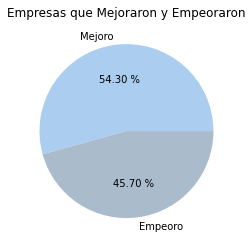

In [137]:
#Generar gráfico de barras de solo las empresas que han mejorado y/o empeorado su ranking con respecto al año anterior.
mayor = df.loc[df['Variación Ranking Tamaño 2020 - 2021'] >=1].count()[0]
menor = df.loc[df['Variación Ranking Tamaño 2020 - 2021'] < 1].count()[0]

plt.figure()
etiquetas = ['Mejoro','Empeoro']
colores = ['#abcdef', '#aabbcc']
plt.pie([mayor, menor], labels= etiquetas, colors=colores, autopct='%.2f %%')
plt.title('Empresas que Mejoraron y Empeoraron')
plt.show()


<function matplotlib.pyplot.show>

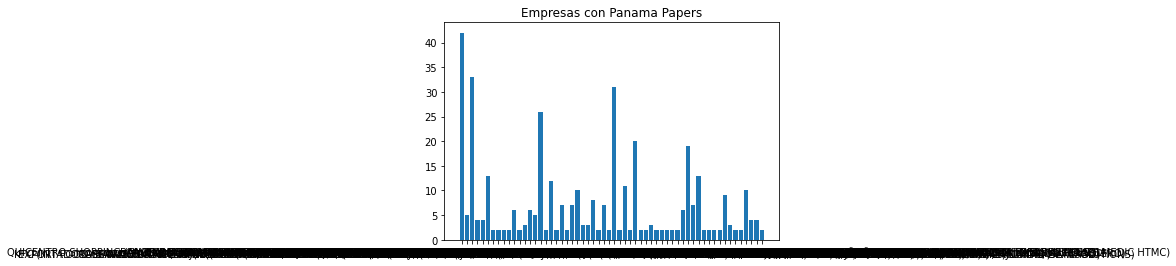

In [136]:
from matplotlib import axes
#Generar gráfico de las empresas que tienen panamá papers.
papers = df.loc[df['No. de Integrantes y Empresas Offshore relacionadas con el Grupo Económico publicados en PANAMÁ PAPERS (***)'] > 0]
numpapers= [papers['No. de Integrantes y Empresas Offshore relacionadas con el Grupo Económico publicados en PANAMÁ PAPERS (***)']]
empresas = [papers['\nNombre Grupo Económico']]
papers = papers.drop([303])

plt.bar(papers['\nNombre Grupo Económico'], papers['No. de Integrantes y Empresas Offshore relacionadas con el Grupo Económico publicados en PANAMÁ PAPERS (***)'])
plt.title("Empresas con Panama Papers")
plt.show


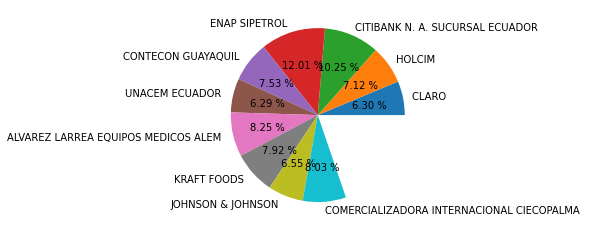

In [129]:
#Generar un pie de las empresas que más aportan a la economía del país.
import re

contribucion=df.loc[df["Ranking Contribución I.R. 2020"] <=10]
listValor=[]
for valor in contribucion["Contribución   I.R. 2020"]:
  listValor.append(float(valor))

ets=[]
for nombres in contribucion["\nNombre Grupo Económico"].values:
  ets.append(nombres.split("(")[0])
plt.pie(listValor, labels=ets, autopct='%.2f %%')
plt.show()

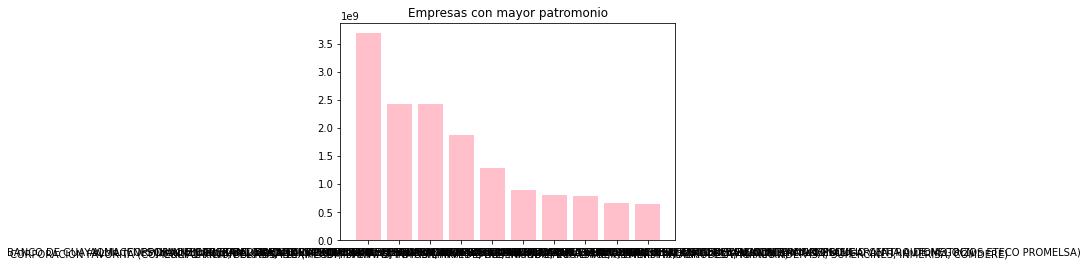

In [135]:
#Obtener las empresas que mayor patrimonio tienen (10).
df['Total Patrimonio (7) 2020']  = df['Total Patrimonio (7) 2020'].replace(0,np.nan)
patrimonio = df.sort_values(['Total Patrimonio (7) 2020'],ascending=False)
nuevospatrimonios=patrimonio['Total Patrimonio (7) 2020']
empresas=df['\nNombre Grupo Económico']
#grafica
plt.bar(empresas[1:11], nuevospatrimonios[1:11], color='pink')
plt.title("Empresas con mayor patrimonio")
plt.show()

##Conclusiones
Despues de realizar el analisis grafico, se puede visualizar en la primera grafica que no existe un gran porcentaje de empresas que empeoraron con respecto al anterio año

En la grafica 2 se puede apreciar que un gran numero de empresas tiene panama papers, por ende se deberia realizar un analisis a nivel empresarial

En la siguiente grafica se puede visualizar que la empresa que contribuye al pais en gran escala es ENAP, esta grafica nos permite ver todas las empresas que tiene mayor impacto.

